# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

# Import Data

In [79]:
df = pd.read_csv('./data/sidewalk_cafe_inspections.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
0,40364958,WHITE HORSE TAVERN,MANHATTAN,10014,22,11,19.437500,1,Active,728.0,...,0,0,0,0,0,0,0,0,1,0
1,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.shape

(435, 123)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 123 entries, CAMIS to QUEENS
dtypes: float64(6), int64(112), object(5)
memory usage: 418.1+ KB


# EDA

#### Class Imbalance Evaluation

In [10]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
df.GRADE.value_counts()

1    424
0     11
Name: GRADE, dtype: int64

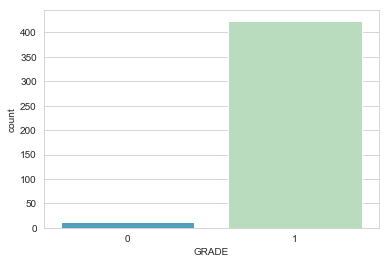

In [11]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=df,palette='GnBu_r')

#### Outlier Evaluation

In [12]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,4.580712e+07,10288.760920,9.126437,7.291954,14.398551,0.974713,240.972414,9.783908,22.071264,158.411494,...,0.009195,0.002299,0.002299,0.013793,0.002299,0.002299,0.016092,0.135632,0.765517,0.082759
std,4.418490e+06,490.330715,5.940963,4.287997,5.607098,0.157177,159.080130,6.728728,14.604683,100.312982,...,0.095561,0.047946,0.047946,0.116766,0.047946,0.047946,0.125974,0.342792,0.424163,0.275834
min,4.036496e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.140928e+07,10012.000000,5.000000,4.000000,10.633333,1.000000,131.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.000075e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,195.000000,8.000000,18.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.005042e+07,10128.000000,13.000000,10.000000,17.291667,1.000000,305.000000,12.000000,28.000000,112.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11432.000000,34.000000,25.000000,42.000000,1.000000,1253.000000,52.000000,104.000000,412.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


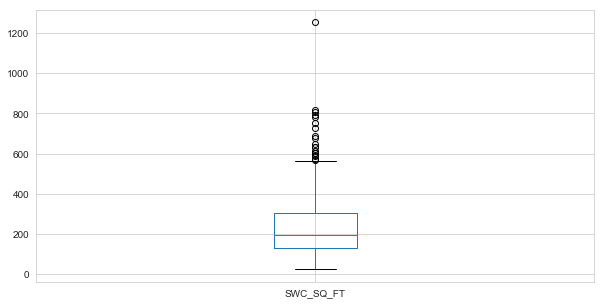

In [39]:
# Boxplot of SWC_SQ_FT to look at outliers visually
plt.figure(figsize=(10,5))
df.boxplot(column=['SWC_SQ_FT'])

In [40]:
# check the value counts of target variable for the outliers in SWC_SQ_FT
df[df.SWC_SQ_FT >=570].GRADE.value_counts()

1    19
Name: GRADE, dtype: int64

In [80]:
df = df[df.SWC_SQ_FT<525]

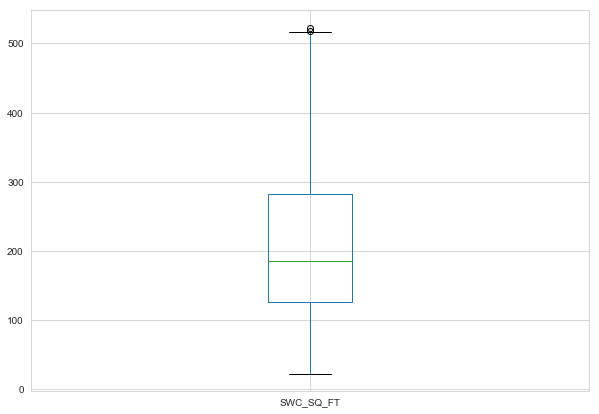

In [81]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_SQ_FT'])

In [82]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.0,407.000000,407.000000,407.0,407.000000,407.000000,407.000000,407.00000
mean,4.588307e+07,10282.203931,9.117936,7.309582,14.329610,0.972973,212.631450,8.727273,19.712531,156.434889,...,0.009828,0.002457,0.0,0.014742,0.002457,0.0,0.014742,0.140049,0.771499,0.07371
std,4.415497e+06,486.749402,5.932365,4.338223,5.595273,0.162362,114.383233,4.996237,11.004630,98.078485,...,0.098769,0.049568,0.0,0.120667,0.049568,0.0,0.120667,0.347465,0.420384,0.26162
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,4.141009e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.500000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
50%,5.000116e+07,10024.000000,8.000000,7.000000,13.375000,1.000000,186.000000,8.000000,17.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
75%,5.005042e+07,10075.000000,13.000000,10.000000,17.250000,1.000000,283.000000,11.000000,26.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,523.000000,30.000000,64.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000


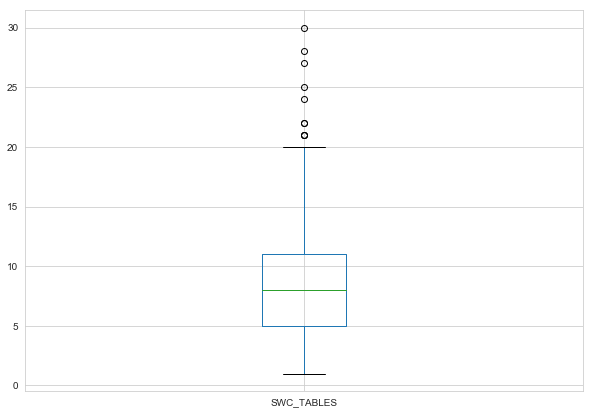

In [83]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])

In [86]:
# check value counts of Grade for the restaurants with outlier SWC TABLE counts
df[df['SWC_TABLES']>20].GRADE.value_counts()

1    10
Name: GRADE, dtype: int64

In [87]:
# drop outliers
df = df[df['SWC_TABLES']<=20]

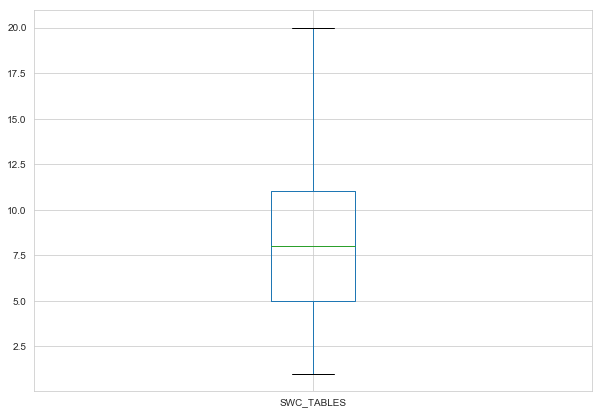

In [88]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])

In [89]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.970000e+02,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.0,397.000000,397.000000,397.0,397.000000,397.000000,397.000000,397.000000
mean,4.595819e+07,10279.443325,9.133501,7.307305,14.386275,0.972292,206.400504,8.340050,18.952141,155.962217,...,0.010076,0.002519,0.0,0.012594,0.002519,0.0,0.015113,0.138539,0.773300,0.073048
std,4.408222e+06,484.049892,5.947566,4.366571,5.640947,0.164341,108.559988,4.385206,9.959272,97.711832,...,0.099996,0.050189,0.0,0.111657,0.050189,0.0,0.122158,0.345901,0.419225,0.260543
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.142270e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000155e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,183.000000,8.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.005214e+07,10075.000000,13.000000,10.000000,17.333333,1.000000,277.000000,11.000000,24.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,518.000000,20.000000,56.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


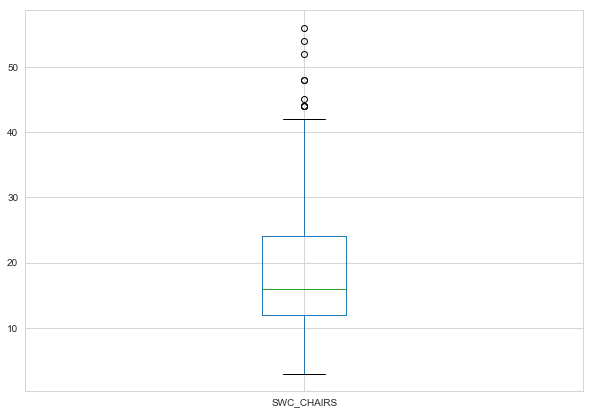

In [90]:
# Boxplot of SWC_CHAIRS to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])

In [95]:
# check value counts of Grade for the restaurants with outlier SWC CHAIRS counts
df[df['SWC_CHAIRS']>=45].GRADE.value_counts()

1    5
0    1
Name: GRADE, dtype: int64

In [96]:
# drop rows where the # of SWC Chairs are outliers
df = df[df['SWC_CHAIRS']<45]

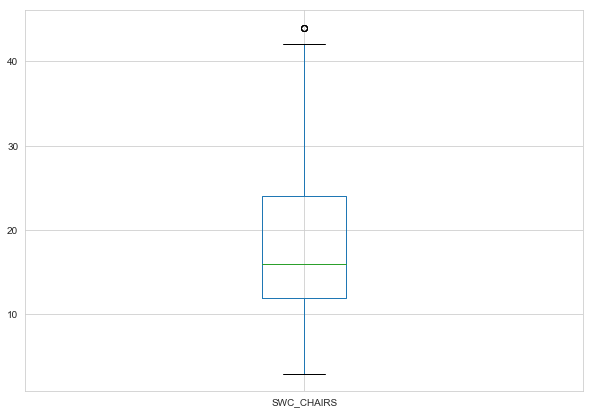

In [97]:
# Boxplot of SWC_CHAIRS to look at outliers visually after dropping outliers in SWC Chairs
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])

In [98]:
df.shape

(391, 123)

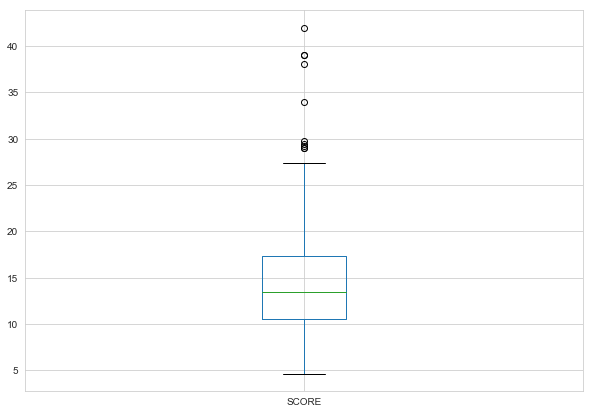

In [99]:
# Boxplot of SWC_CHAIRS to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SCORE'])

In [109]:
# look at target column value counts for the outliers
df[df.SCORE >= 28].GRADE.value_counts()

1    5
0    5
Name: GRADE, dtype: int64

In [110]:
# drop outliers
df = df[df.SCORE < 28]

In [111]:
df.shape

(381, 123)

In [112]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.0,381.000000,381.000000,381.0,381.000000,381.000000,381.000000,381.000000
mean,4.587950e+07,10287.154856,9.073491,7.307087,13.889140,0.986877,204.278215,8.230971,18.595801,157.233596,...,0.010499,0.002625,0.0,0.013123,0.002625,0.0,0.015748,0.144357,0.766404,0.073491
std,4.412414e+06,489.691911,5.881269,4.307604,4.677121,0.113953,105.940730,4.250596,9.248009,98.468860,...,0.102058,0.051232,0.0,0.113953,0.051232,0.0,0.124663,0.351913,0.423674,0.261284
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.141183e+07,10012.000000,5.000000,4.000000,10.400000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000112e+07,10024.000000,8.000000,7.000000,13.333333,1.000000,183.000000,8.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.004935e+07,10075.000000,13.000000,10.000000,17.000000,1.000000,274.000000,11.000000,24.000000,110.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,29.000000,25.000000,27.333333,1.000000,517.000000,20.000000,44.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Correlation

In [115]:
df.loc[:, 'CAMIS':'MONTH_12'].corr()[df.loc[:, 'CAMIS':'MONTH_12'].corr() > 0.5]

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
CAMIS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,1.000000,0.741603,0.727811,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Not Critical,NaN,NaN,0.741603,1.000000,0.519361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,NaN,NaN,0.727811,0.519361,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.746721,0.839601,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_TABLES,NaN,NaN,NaN,NaN,NaN,NaN,0.746721,1.000000,0.896566,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,NaN,NaN,NaN,0.839601,0.896566,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,0.967327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# create a new dataframe with dropped highly correlated features
data = df.drop(['FLAG__Not Critical', 'SWC_TABLES', 'ZIPCODE', 'CITY_COUNCIL_DISTRICT'], axis=1).copy()

In [117]:
data.loc[:, 'FLAG__Critical':'MONTH_12'].corr()[df.loc[:, 'FLAG__Critical':'MONTH_12'].corr() > 0.5]

,FLAG__Critical,SCORE,GRADE,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
FLAG__Critical,1.000000,0.727811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,0.727811,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,1.000000,0.839601,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,0.839601,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizations

In [118]:
# create table for heatmap visualization (next step)
tc = df.pivot_table(index='SWC_TABLES', columns='SWC_CHAIRS',values='GRADE') 

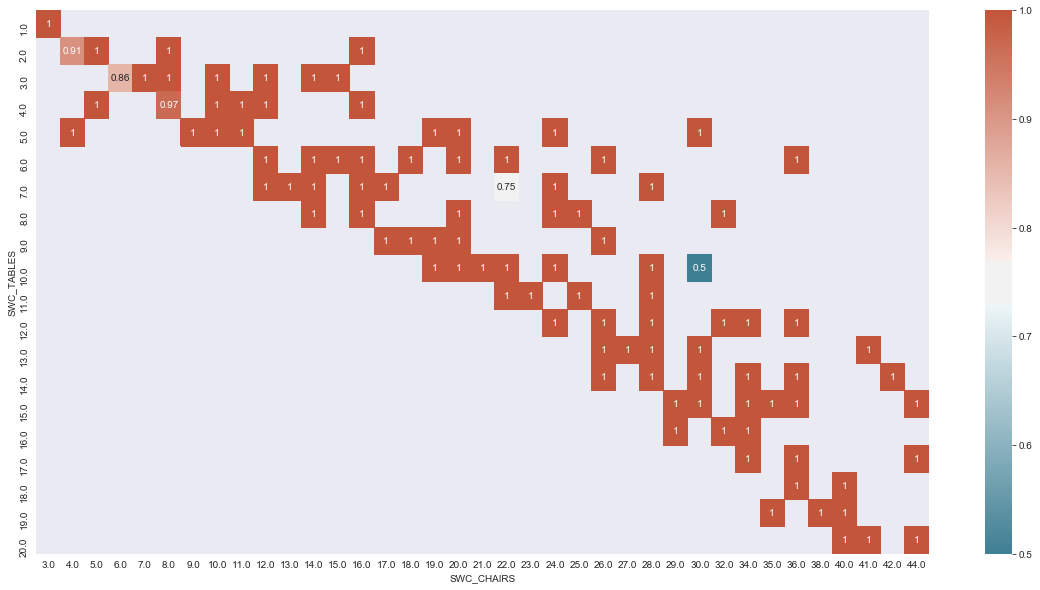

In [133]:
# visualizing the relationship between # of tables and chairs and grade received
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(tc, annot=True, cmap=cmap)

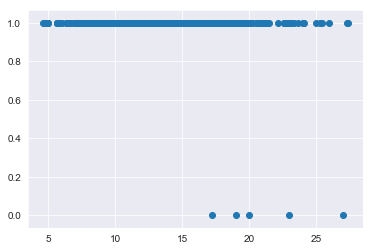

In [137]:
plt.scatter(x=data.SCORE, y=data.GRADE)